#Start

In [ ]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
# Mounting Drive to the Colab Notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# We will read our CSV file from our Google Drive and store it in a variable called df
df = pd.read_csv('/content/drive/MyDrive/BRAC/Thesis/Loan/Dataset/Better/application_data.csv')

In [ ]:
#Toufique Runs
# df = pd.read_csv('/content/drive/MyDrive/Coding/437 Project/application_data.csv')

In [ ]:
#Viewing the shape and structure of our dataset/ counting rows and columns of the data set
df.shape

(307511, 122)

In [ ]:
#Viewing a portion of the dataset to learn more about it
df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

#Preprocessing Begins

In [ ]:
# Counting the empty columns
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [ ]:
df['HOUSETYPE_MODE'].unique()

array(['block of flats', nan, 'terraced house', 'specific housing'],
      dtype=object)

In [ ]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [ ]:
df['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [ ]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

# Rows 1-30 Toufique

In [ ]:
# loan_df = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
#        'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
#        'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
#        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
#        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
#        'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
#        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
#        'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
#        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
#        'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT']]

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

# One Hot Encoding

In [ ]:
!pip install category_encoders #for ONE HOT ENCODING

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

In [ ]:
#specify that all columns should be shown
pd.set_option('max_columns', None)

#view DataFrame
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [ ]:
# import modules
# from numpy import isnan
# from sklearn.impute import SimpleImputer

#df['OCCUPATION_TYPE'].isnull().sum()
# df['OCCUPATION_TYPE'].unique()

# df['REGION_RATING_CLIENT'].unique() # ---- checked --- 
# df['REGION_RATING_CLIENT'].isnull().sum() #None

# df['CNT_FAM_MEMBERS'].unique() # ----- includes nan -----
# df['CNT_FAM_MEMBERS'].isnull().sum() #None

# df['NAME_HOUSING_TYPE'].unique() # ----enc-
# df['NAME_HOUSING_TYPE'].isnull().sum() #None

# df['NAME_FAMILY_STATUS'].unique() #----enc-
# df['NAME_FAMILY_STATUS'].isnull().sum()

# df['NAME_EDUCATION_TYPE'].unique() #----enc-
# df['NAME_EDUCATION_TYPE'].isnull().sum() #None

# df['NAME_INCOME_TYPE'].unique() #----enc-
# df['NAME_INCOME_TYPE'].isnull().sum() #None

#df['NAME_TYPE_SUITE'].unique() #----can drop
# df['NAME_INCOME_TYPE'].isnull().sum() #None

In [ ]:
# import numpy as np
# flags = np.unique(df[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
#        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',]].values)

uniqueValues = (df['FLAG_MOBIL'].append(df['FLAG_EMP_PHONE'])).unique()
print(uniqueValues)


[1 0]


In [ ]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
# obj_df = loan_df.select_dtypes(include=['object']).copy()
# obj_df.head()

In [ ]:
# obj_df[obj_df.isnull().any(axis=1)]

In [ ]:
df["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
#Removing transgenders
mask = df["CODE_GENDER"] =="XNA"
df = df[~mask]

In [ ]:
df["CODE_GENDER"].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [ ]:
df["NAME_TYPE_SUITE"].value_counts() #Ordinal

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].str.replace('Spouse, partner', 'Spouse', regex = False) 
df["NAME_TYPE_SUITE"].value_counts()

<ipython-input-179-a1c765c1f230>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].str.replace('Spouse, partner', 'Spouse', regex = False)


Unaccompanied      248523
Family              40148
Spouse              11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
df["NAME_INCOME_TYPE"].value_counts() #Ordinal / One Hot

Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
df["NAME_EDUCATION_TYPE"].value_counts()  #Ordinal / One Hot

Secondary / secondary special    218389
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].str.replace('Secondary / secondary special', 'Secondary special', regex = False) 
df["NAME_EDUCATION_TYPE"].value_counts()

<ipython-input-182-89558734d5cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].str.replace('Secondary / secondary special', 'Secondary special', regex = False)


Secondary special    218389
Higher education      74862
Incomplete higher     10276
Lower secondary        3816
Academic degree         164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
df["NAME_FAMILY_STATUS"].value_counts() #Ordinal / One Hot


Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
mask = df["NAME_FAMILY_STATUS"] =="Unknown"
df = df[~mask]
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].str.replace('Single / not married', 'Single', regex = False) 
df["NAME_FAMILY_STATUS"].value_counts()

<ipython-input-184-447c4903cacb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].str.replace('Single / not married', 'Single', regex = False)


Married           196429
Single             45444
Civil marriage     29774
Separated          19770
Widow              16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
df["NAME_HOUSING_TYPE"].value_counts() #Ordinal / One Hot

House / apartment      272864
With parents            14840
Municipal apartment     11181
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].str.replace('House / apartment', 'House', regex = False) 
df["NAME_HOUSING_TYPE"].value_counts() #ONE HOT

House                  272864
With parents            14840
Municipal apartment     11181
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
df["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
flag_encoded = {"FLAG_OWN_CAR":     {"Y": 1, "N": 0},
                "FLAG_OWN_REALTY": {"Y": 1, "N": 0}}

df = df.replace(flag_encoded)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0         351000.0   Unaccompanied          Working   Secondary special   
1        1129500.0          Family    State servant    Higher education   
2         135000.0   Unaccompanied          Working   Secondary special   
3         297000.0   Unaccompanied          Working   Secondary special   
4         513000.0   Unaccompanied          Working   Secondary special   

  NAME_FAMILY_STATUS NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0             Single             House                    0.018801   
1            Married             House                    0.003541   
2             Single             House                    0.010032   
3     Civil marriage             House                    0.008019   
4             Single             House                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          NaN   
1      -16765          -1188            -1186.0             -291          NaN   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          NaN   
4      -19932          -3038            -4311.0            -3458          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                           

In [ ]:
df["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         278232
Revolving loans     29273
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
flag_encoded = {"NAME_CONTRACT_TYPE":     {"Cash loans": 1, "Revolving loans": 0}}

df = df.replace(flag_encoded)
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1           M             0   
1      100003       0                   1           F             0   
2      100004       0                   0           M             1   
3      100006       0                   1           F             0   
4      100007       0                   1           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0         351000.0   Unaccompanied          Working   Secondary special   
1        1129500.0          Family    State servant    Higher education   
2         135000.0   Unaccompanied          Working   Secondary special   
3         297000.0   Unaccompanied          Working   Secondary special   
4         513000.0   Unaccompanied          Working   Secondary special   

  NAME_FAMILY_STATUS NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0             Single             House                    0.018801   
1            Married             House                    0.003541   
2             Single             House                    0.010032   
3     Civil marriage             House                    0.008019   
4             Single             House                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          NaN   
1      -16765          -1188            -1186.0             -291          NaN   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          NaN   
4      -19932          -3038            -4311.0            -3458          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                     

In [ ]:
gender_encoded = {"CODE_GENDER":     {"M": 1, "F": 0}}
df = df.replace(gender_encoded)
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            1             0   
1      100003       0                   1            0             0   
2      100004       0                   0            1             1   
3      100006       0                   1            0             0   
4      100007       0                   1            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0         351000.0   Unaccompanied          Working   Secondary special   
1        1129500.0          Family    State servant    Higher education   
2         135000.0   Unaccompanied          Working   Secondary special   
3         297000.0   Unaccompanied          Working   Secondary special   
4         513000.0   Unaccompanied          Working   Secondary special   

  NAME_FAMILY_STATUS NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0             Single             House                    0.018801   
1            Married             House                    0.003541   
2             Single             House                    0.010032   
3     Civil marriage             House                    0.008019   
4             Single             House                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          NaN   
1      -16765          -1188            -1186.0             -291          NaN   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          NaN   
4      -19932          -3038            -4311.0            -3458          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0               

In [ ]:
#Dropping Unneceary column
df.drop(['NAME_TYPE_SUITE'], axis = 1, inplace = False)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   1            1             0   
1           100003       0                   1            0             0   
2           100004       0                   0            1             1   
3           100006       0                   1            0             0   
4           100007       0                   1            1             0   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   1            1             0   
307507      456252       0                   1            0             0   
307508      456253       0                   1            0             0   
307509      456254       1                   1            0             0   
307510      456255       0                   1            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     0             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307506                0             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   
307510                0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
0           24700.5         351000.0               Working   
1           35698.5        1129500.0         State servant   
2            6750.0         135000.0               Working   
3           29686.5         297000.0               Working   
4           21865.5         513000.0               Working   
...             ...              ...                   ...   
307506      27558.0         225000.0               Working   
307507      12001.5         225000.0             Pensioner   
307508      29979.0         585000.0               Working   
307509      20205.0         319500.0  Commercial associate   
307510      49117.5         675000.0  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE  \
0        Secondary special             Single             House   
1         Higher education            Married             House   
2        Secondary special             Single             House   
3        Secondary special     Civil marriage             House   
4        Secondary special             Single             House   
...                    ...                ...               ...   
307506   Secondary special          Separated      With parents   
307507   Secondary special              Widow             House   
307508    Higher education          Separated             House   
307509   Secondary special            Married             House   
307510    Higher education            Married             House   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                         0.018801       -9461           -637   
1                         0.003541      -16765          -1188   
2                         0.010032      -19046           -225   
3                         0.008019      -19005          -3039   
4                         0.028663      -19932          -3038   
...                            ...         ...            ...   
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.00

In [ ]:
#Replacing NaN Values -- Method 1 --- 
df.OCCUPATION_TYPE.fillna("None", inplace = True)

## Replacing NaN Values -- Method 2 ---

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy = 'Most Frequent')
# imputer = SimpleImputer(strategy = 'constant', fill_value = 'missing')
# imputer.fit_transform('data')

df["OCCUPATION_TYPE"].value_counts()

None                     96389
Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Encoding Part

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["OCCUPATION_TYPE"] = ord_enc.fit_transform(df[["OCCUPATION_TYPE"]])
df[[ "OCCUPATION_TYPE"]]


OCCUPATION_TYPE
0                   8.0
1                   3.0
2                   8.0
3                   8.0
4                   3.0
...                 ...
307506             15.0
307507             12.0
307508             10.0
307509              8.0
307510              8.0

[307505 rows x 1 columns]

In [ ]:
ord_enc = OrdinalEncoder()
df["NAME_TYPE_SUITE"] = ord_enc.fit_transform(df[["NAME_TYPE_SUITE"]])
df[[ "NAME_TYPE_SUITE"]]


NAME_TYPE_SUITE
0                   6.0
1                   1.0
2                   6.0
3                   6.0
4                   6.0
...                 ...
307506              6.0
307507              6.0
307508              6.0
307509              6.0
307510              6.0

[307505 rows x 1 columns]

In [ ]:
df["NAME_INCOME_TYPE"] = ord_enc.fit_transform(df[["NAME_INCOME_TYPE"]])
df[[ "NAME_INCOME_TYPE"]]

NAME_INCOME_TYPE
0                    7.0
1                    4.0
2                    7.0
3                    7.0
4                    7.0
...                  ...
307506               7.0
307507               3.0
307508               7.0
307509               1.0
307510               1.0

[307505 rows x 1 columns]

In [ ]:
df["NAME_EDUCATION_TYPE"] = ord_enc.fit_transform(df[["NAME_EDUCATION_TYPE"]])
df[[ "NAME_EDUCATION_TYPE"]]

NAME_EDUCATION_TYPE
0                       4.0
1                       1.0
2                       4.0
3                       4.0
4                       4.0
...                     ...
307506                  4.0
307507                  4.0
307508                  1.0
307509                  4.0
307510                  1.0

[307505 rows x 1 columns]

In [ ]:
df["NAME_FAMILY_STATUS"] = ord_enc.fit_transform(df[["NAME_FAMILY_STATUS"]])
df[[ "NAME_FAMILY_STATUS"]]

NAME_FAMILY_STATUS
0                      3.0
1                      1.0
2                      3.0
3                      0.0
4                      3.0
...                    ...
307506                 2.0
307507                 4.0
307508                 2.0
307509                 1.0
307510                 1.0

[307505 rows x 1 columns]

In [ ]:
ord_enc = OrdinalEncoder()
df["WEEKDAY_APPR_PROCESS_START"] = ord_enc.fit_transform(df[["WEEKDAY_APPR_PROCESS_START"]])
df[[ "WEEKDAY_APPR_PROCESS_START"]]

WEEKDAY_APPR_PROCESS_START
0                              6.0
1                              1.0
2                              1.0
3                              6.0
4                              4.0
...                            ...
307506                         4.0
307507                         1.0
307508                         4.0
307509                         6.0
307510                         4.0

[307505 rows x 1 columns]

In [ ]:
ord_enc = OrdinalEncoder()
df["ORGANIZATION_TYPE"] = ord_enc.fit_transform(df[["ORGANIZATION_TYPE"]])
df[[ "ORGANIZATION_TYPE"]]

ORGANIZATION_TYPE
0                     5.0
1                    39.0
2                    11.0
3                     5.0
4                    37.0
...                   ...
307506               43.0
307507               57.0
307508               39.0
307509                3.0
307510                5.0

[307505 rows x 1 columns]

In [ ]:
# !pip install category_encoders #for ONE HOT ENCODING
# import category_encoders as ce
encoder = ce.OneHotEncoder(cols = 'NAME_HOUSING_TYPE', use_cat_names = True)
df = encoder.fit_transform(df)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            1             0   
1      100003       0                   1            0             0   
2      100004       0                   0            1             1   
3      100006       0                   1            0             0   
4      100007       0                   1            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0              6.0               7.0                  4.0   
1        1129500.0              1.0               4.0                  1.0   
2         135000.0              6.0               7.0                  4.0   
3         297000.0              6.0               7.0                  4.0   
4         513000.0              6.0               7.0                  4.0   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE_House  \
0                 3.0                        1   
1                 1.0                        1   
2                 3.0                        1   
3                 0.0                        1   
4                 3.0                        1   

   NAME_HOUSING_TYPE_Rented apartment  NAME_HOUSING_TYPE_With parents  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   

   NAME_HOUSING_TYPE_Municipal apartment  NAME_HOUSING_TYPE_Office apartment  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   NAME_HOUSING_TYPE_Co-op apartment  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0                                  0                    0.018801       -9461   
1                                  0                    0.003541      -16765   
2                                  0                    0.010032      -19046   
3                                  0                    0.008019      -19005   
4                                  0                    0.028663      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637            -3648.0            -2120          NaN           1   
1          -1188            -1186.0             -291          NaN           1   
2           -225            -4260.0            -2531         26.0           1   
3          -3039            -9833.0            -2437          NaN           1   
4          -3038            -4311.0            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0   

In [ ]:
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            1             0   
1      100003       0                   1            0             0   
2      100004       0                   0            1             1   
3      100006       0                   1            0             0   
4      100007       0                   1            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0              6.0               7.0                  4.0   
1        1129500.0              1.0               4.0                  1.0   
2         135000.0              6.0               7.0                  4.0   
3         297000.0              6.0               7.0                  4.0   
4         513000.0              6.0               7.0                  4.0   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE_House  \
0                 3.0                        1   
1                 1.0                        1   
2                 3.0                        1   
3                 0.0                        1   
4                 3.0                        1   

   NAME_HOUSING_TYPE_Rented apartment  NAME_HOUSING_TYPE_With parents  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   

   NAME_HOUSING_TYPE_Municipal apartment  NAME_HOUSING_TYPE_Office apartment  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   NAME_HOUSING_TYPE_Co-op apartment  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0                                  0                    0.018801       -9461   
1                                  0                    0.003541      -16765   
2                                  0                    0.010032      -19046   
3                                  0                    0.008019      -19005   
4                                  0                    0.028663      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637            -3648.0            -2120          NaN           1   
1          -1188            -1186.0             -291          NaN           1   
2           -225            -4260.0            -2531         26.0           1   
3          -3039            -9833.0            -2437          NaN           1   
4          -3038            -4311.0            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0   


# Rows 31-60 Sadid
# Rows 61-90 Muba
# Rows 91-124 Masroor

#Sadid (61-90)

almost all of the later ones are numerical floating normalized values

In [ ]:
df.iloc[:, 28:70]=df.iloc[:, 28:70].fillna(-1)
df['OCCUPATION_TYPE'].replace({-1:"None"})
df['ORGANIZATION_TYPE'].replace({-1:"None"})

0          5.0
1         39.0
2         11.0
3          5.0
4         37.0
          ... 
307506    43.0
307507    57.0
307508    39.0
307509     3.0
307510     5.0
Name: ORGANIZATION_TYPE, Length: 307505, dtype: float64

In [ ]:
df['OCCUPATION_TYPE'].value_counts()

12.0    96389
8.0     55186
15.0    32102
3.0     27569
10.0    21370
4.0     18603
6.0     11380
0.0      9812
11.0     8537
17.0     6721
2.0      5946
1.0      4653
13.0     2652
9.0      2092
18.0     1348
16.0     1305
14.0      751
5.0       563
7.0       526
Name: OCCUPATION_TYPE, dtype: int64

# Masroor SPACE (91-124)


In [ ]:
df['WALLSMATERIAL_MODE'].fillna('None', inplace = True)

In [ ]:
df['WALLSMATERIAL_MODE'].head(15)

0     Stone, brick
1            Block
2             None
3             None
4             None
5             None
6             None
7             None
8             None
9             None
10            None
11            None
12            None
13           Panel
14           Panel
Name: WALLSMATERIAL_MODE, dtype: object

In [ ]:
df['WALLSMATERIAL_MODE'].value_counts()

None            156339
Panel            66038
Stone, brick     64813
Block             9253
Wooden            5362
Mixed             2296
Monolithic        1779
Others            1625
Name: WALLSMATERIAL_MODE, dtype: int64

In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OneHotEncoder(cols = 'WALLSMATERIAL_MODE', use_cat_names = True)

In [ ]:
df = encoder.fit_transform(df)

To verify the one hot encoding

In [ ]:
#specify that all columns should be shown
pd.set_option('max_columns', None)

#view DataFrame
df

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   1            1             0   
1           100003       0                   1            0             0   
2           100004       0                   0            1             1   
3           100006       0                   1            0             0   
4           100007       0                   1            1             0   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   1            1             0   
307507      456252       0                   1            0             0   
307508      456253       0                   1            0             0   
307509      456254       1                   1            0             0   
307510      456255       0                   1            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     0             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307506                0             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   
307510                0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0           24700.5         351000.0              6.0               7.0   
1           35698.5        1129500.0              1.0               4.0   
2            6750.0         135000.0              6.0               7.0   
3           29686.5         297000.0              6.0               7.0   
4           21865.5         513000.0              6.0               7.0   
...             ...              ...              ...               ...   
307506      27558.0         225000.0              6.0               7.0   
307507      12001.5         225000.0              6.0               3.0   
307508      29979.0         585000.0              6.0               7.0   
307509      20205.0         319500.0              6.0               1.0   
307510      49117.5         675000.0              6.0               1.0   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE_House  \
0                       4.0                 3.0                        1   
1                       1.0                 1.0                        1   
2                       4.0                 3.0                        1   
3                       4.0                 0.0                        1   
4                       4.0                 3.0                        1   
...                     ...                 ...                      ...   
307506                  4.0                 2.0                        0   
307507                  4.0                 4.0                        1   
307508                  1.0                 2.0                        1   
307509                  4.0                 1.0                        1   
307510                  1.0                 1.0                        1   

        NAME_HOUSING_TYPE_Rented apartment  NAME_HOUSING_TYPE_With parents  \
0                                        0                               0   
1                                        0                               0   
2                                        0                               0   
3                                        0                               0   
4                         

In [ ]:
df['EMERGENCYSTATE_MODE'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [ ]:
df['EMERGENCYSTATE_MODE'].fillna('None', inplace = True)

In [ ]:
encoder = ce.OneHotEncoder(cols = 'EMERGENCYSTATE_MODE', use_cat_names = True)

In [ ]:
df = encoder.fit_transform(df)

In [ ]:
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE_House',
       'NAME_HOUSING_TYPE_Rented apartment',
       'NAME_HOUSING_TYPE_With parents',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Co-op apartment', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_RE

In [ ]:
# cols = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
#        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
# # df[cols] = [df[x].replace({'None':-1}) for x in cols]
# df[cols] = df[cols].replace({-1:"None"})
# df[cols]
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna('-1', inplace = True)
df['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna('-1', inplace = True)
df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna('-1', inplace = True)
df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna('-1', inplace = True)
df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()


0

In [ ]:
df = df.dropna(axis = 0, subset = ['DAYS_LAST_PHONE_CHANGE'])

df['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna('-1', inplace = True)
df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna('-1', inplace = True)
df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna('-1', inplace = True)
df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

df['AMT_REQ_CREDIT_BUREAU_MON'].fillna('-1', inplace = True)
df['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna('-1', inplace = True)
df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna('-1', inplace = True)
df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

#Muballigh Columns (61-90) 

In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)

In [ ]:
# Imputing 'APARTMENTS_MODE'
impute.fit(df[['APARTMENTS_MODE']])

SimpleImputer(fill_value=-1, strategy='constant')

In [ ]:
df['APARTMENTS_MODE'] = impute.transform(df[['APARTMENTS_MODE']])

In [ ]:
df['APARTMENTS_MODE'].head(15)

0     0.0252
1     0.0924
2    -1.0000
3    -1.0000
4    -1.0000
5    -1.0000
6    -1.0000
7    -1.0000
8    -1.0000
9    -1.0000
10   -1.0000
11   -1.0000
12    0.0840
13    0.1502
14    0.3561
Name: APARTMENTS_MODE, dtype: float64

In [ ]:
# Imputing 'BASEMENTAREA_MODE'
impute.fit(df[['BASEMENTAREA_MODE']])
df['BASEMENTAREA_MODE'] = impute.transform(df[['BASEMENTAREA_MODE']])
print(df['BASEMENTAREA_MODE'].isnull().sum()) # checking if 'BASEMENTAREA_MODE' has any empty values
df['BASEMENTAREA_MODE'].head(15)

0


0     0.0383
1     0.0538
2    -1.0000
3    -1.0000
4    -1.0000
5    -1.0000
6    -1.0000
7    -1.0000
8    -1.0000
9    -1.0000
10   -1.0000
11   -1.0000
12   -1.0000
13    0.1010
14    0.1386
Name: BASEMENTAREA_MODE, dtype: float64

In [ ]:
# Imputing Columns 59 to 85
impute.fit(df.iloc[:,59:85])
df.iloc[:,59:85] = impute.transform(df.iloc[:,59:85])
df.iloc[:,59:85].head(10)

LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
0                0.0202          0.0190                   0.0000   
1                0.0773          0.0549                   0.0039   
2               -1.0000         -1.0000                  -1.0000   
3               -1.0000         -1.0000                  -1.0000   
4               -1.0000         -1.0000                  -1.0000   
5               -1.0000         -1.0000                  -1.0000   
6               -1.0000         -1.0000                  -1.0000   
7               -1.0000         -1.0000                  -1.0000   
8               -1.0000         -1.0000                  -1.0000   
9               -1.0000         -1.0000                  -1.0000   

   NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
0             0.0000           0.0252             0.0383   
1             0.0098           0.0924             0.0538   
2            -1.0000          -1.0000            -1.0000   
3            -1.0000          -1.0000            -1.0000   
4            -1.0000          -1.0000            -1.0000   
5            -1.0000          -1.0000            -1.0000   
6            -1.0000          -1.0000            -1.0000   
7            -1.0000          -1.0000            -1.0000   
8            -1.0000          -1.0000            -1.0000   
9            -1.0000          -1.0000            -1.0000   

   YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0                        0.9722            0.6341           0.0144   
1                        0.9851            0.8040           0.0497   
2                       -1.0000           -1.0000          -1.0000   
3                       -1.0000           -1.0000          -1.0000   
4                       -1.0000           -1.0000          -1.0000   
5                       -1.0000           -1.0000          -1.0000   
6                       -1.0000           -1.0000          -1.0000   
7                       -1.0000           -1.0000          -1.0000   
8                       -1.0000           -1.0000          -1.0000   
9                       -1.0000           -1.0000          -1.0000   

   ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  \
0          0.0000          0.0690          0.0833          0.1250   
1          0.0806          0.0345          0.2917          0.3333   
2         -1.0000         -1.0000         -1.0000         -1.0000   
3         -1.0000         -1.0000         -1.0000         -1.0000   
4         -1.0000         -1.0000         -1.0000         -1.0000   
5         -1.0000         -1.0000         -1.0000         -1.0000   
6         -1.0000         -1.0000         -1.0000         -1.0000   
7         -1.0000         -1.0000         -1.0000         -1.0000   
8         -1.0000         -1.0000         -1.0000         -1.0000   
9         -1.0000         -1.0000         -1.0000         -1.0000   

   LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  \
0         0.0377                  0.022           0.0198   
1         0.0128                  0.079           0.0554   
2        -1.0000                 -1.000          -1.0000   
3        -1.0000                 -1.000          -1.0000   
4        -1.0000                 -1.000          -1.0000   
5        -1.0000                 -1.000          -1.0000   
6        -1.0000                 -1.000          -1.0000   
7        -1.0000                 -1.000          -1.0000   
8        -1.0000                 -1.000          -1.0000   
9        -1.0000                 -1.000          -1.0000   

   NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  \
0                       0.0                 0.0           0.0250   
1                       0.0                 0.0           0.0968   
2                      -1.0                -1.0          -1.0000   
3                      -1.0                -1.0          -1.0000   
4                      -1.0                -1.0          -1.0

In [ ]:
# Imputing 'NONLIVINGAREA_MEDI'
impute.fit(df[['NONLIVINGAREA_MEDI']])
df['NONLIVINGAREA_MEDI'] = impute.transform(df[['NONLIVINGAREA_MEDI']])
df['NONLIVINGAREA_MEDI'].head(15)

0     0.0000
1     0.0100
2    -1.0000
3    -1.0000
4    -1.0000
5    -1.0000
6    -1.0000
7    -1.0000
8    -1.0000
9    -1.0000
10   -1.0000
11   -1.0000
12    0.0000
13    0.0000
14    0.1022
Name: NONLIVINGAREA_MEDI, dtype: float64

In [ ]:
# Imputing 'TOTALAREA_MODE'
impute.fit(df[['TOTALAREA_MODE']])
df['TOTALAREA_MODE'] = impute.transform(df[['TOTALAREA_MODE']])
df['TOTALAREA_MODE'].head(15)

0     0.0149
1     0.0714
2    -1.0000
3    -1.0000
4    -1.0000
5    -1.0000
6    -1.0000
7    -1.0000
8    -1.0000
9    -1.0000
10   -1.0000
11   -1.0000
12    0.0612
13    0.1417
14    0.3811
Name: TOTALAREA_MODE, dtype: float64

In [ ]:
df['FONDKAPREMONT_MODE'].fillna('None', inplace = True)

In [ ]:
encoder = ce.OneHotEncoder(cols = 'FONDKAPREMONT_MODE', use_cat_names = True)

In [ ]:
df = encoder.fit_transform(df)

In [ ]:
df['HOUSETYPE_MODE'].fillna('None', inplace = True)

In [ ]:
encoder = ce.OneHotEncoder(cols = 'HOUSETYPE_MODE', use_cat_names = True)
df = encoder.fit_transform(df)

In [ ]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 143, dtype: int64

In [ ]:
df['LIVINGAPARTMENTS_MEDI'].fillna('-1', inplace = True)
df['LIVINGAPARTMENTS_MEDI'].isnull().sum()

df['LIVINGAREA_MEDI'].fillna('-1', inplace = True)
df['LIVINGAREA_MEDI'].isnull().sum()

df['NONLIVINGAPARTMENTS_MEDI'].fillna('-1', inplace = True)
df['NONLIVINGAPARTMENTS_MEDI'].isnull().sum()

df['FLOORSMIN_MEDI'].fillna('-1', inplace = True)
df['FLOORSMIN_MEDI'].isnull().sum()

df['LANDAREA_MEDI'].fillna('-1', inplace = True)
df['LANDAREA_MEDI'].isnull().sum()

df['OWN_CAR_AGE'].fillna('-1', inplace = True)
df['OWN_CAR_AGE'].isnull().sum()

0

In [ ]:
pd.set_option('display.max_columns', None)
df

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   1            1             0   
1           100003       0                   1            0             0   
2           100004       0                   0            1             1   
3           100006       0                   1            0             0   
4           100007       0                   1            1             0   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   1            1             0   
307507      456252       0                   1            0             0   
307508      456253       0                   1            0             0   
307509      456254       1                   1            0             0   
307510      456255       0                   1            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     0             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307506                0             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   
307510                0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0           24700.5         351000.0              6.0               7.0   
1           35698.5        1129500.0              1.0               4.0   
2            6750.0         135000.0              6.0               7.0   
3           29686.5         297000.0              6.0               7.0   
4           21865.5         513000.0              6.0               7.0   
...             ...              ...              ...               ...   
307506      27558.0         225000.0              6.0               7.0   
307507      12001.5         225000.0              6.0               3.0   
307508      29979.0         585000.0              6.0               7.0   
307509      20205.0         319500.0              6.0               1.0   
307510      49117.5         675000.0              6.0               1.0   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE_House  \
0                       4.0                 3.0                        1   
1                       1.0                 1.0                        1   
2                       4.0                 3.0                        1   
3                       4.0                 0.0                        1   
4                       4.0                 3.0                        1   
...                     ...                 ...                      ...   
307506                  4.0                 2.0                        0   
307507                  4.0                 4.0                        1   
307508                  1.0                 2.0                        1   
307509                  4.0                 1.0                        1   
307510                  1.0                 1.0                        1   

        NAME_HOUSING_TYPE_Rented apartment  NAME_HOUSING_TYPE_With parents  \
0                                        0                               0   
1                                        0                               0   
2                                        0                               0   
3                                        0                               0   
4                         

In [ ]:
df.isnull().sum().sum()

1578

In [ ]:
# using dropna() function  
df = df.dropna(axis=0)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# Finding out Correlation between columns
df.iloc[:,1:144].corr()




TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
TARGET              1.000000            0.031170     0.055005     -0.021783   
NAME_CONTRACT_TYPE  0.031170            1.000000     0.008539     -0.006213   
CODE_GENDER         0.055005            0.008539     1.000000      0.346081   
FLAG_OWN_CAR       -0.021783           -0.006213     0.346081      1.000000   
FLAG_OWN_REALTY    -0.006687           -0.065964    -0.044212     -0.002088   
...                      ...                 ...          ...           ...   
FLAG_DOCUMENT_17   -0.003312            0.000396     0.003699     -0.002651   
FLAG_DOCUMENT_18   -0.007818            0.006278     0.021570      0.000385   
FLAG_DOCUMENT_19   -0.001578            0.004933     0.004103      0.001577   
FLAG_DOCUMENT_20    0.000428            0.007183     0.003237      0.007027   
FLAG_DOCUMENT_21    0.003849           -0.055556     0.023707      0.007076   

                    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                    -0.006687      0.019272         -0.003920   
NAME_CONTRACT_TYPE        -0.065964     -0.029637          0.003011   
CODE_GENDER               -0.044212      0.047421          0.074581   
FLAG_OWN_CAR              -0.002088      0.102218          0.083046   
FLAG_OWN_REALTY            1.000000     -0.002585          0.003338   
...                             ...           ...               ...   
FLAG_DOCUMENT_17          -0.013874      0.000458          0.002299   
FLAG_DOCUMENT_18          -0.085825      0.003239          0.003044   
FLAG_DOCUMENT_19          -0.018593      0.000572          0.002432   
FLAG_DOCUMENT_20          -0.024590      0.001025          0.000352   
FLAG_DOCUMENT_21          -0.000080     -0.002520         -0.000543   

                    AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  \
TARGET               -0.030313    -0.012816        -0.039585         0.008517   
NAME_CONTRACT_TYPE    0.220714     0.240621         0.186076        -0.011288   
CODE_GENDER           0.021171     0.076880         0.022134         0.029944   
FLAG_OWN_CAR          0.115384     0.140897         0.119940         0.004330   
FLAG_OWN_REALTY      -0.037499    -0.005007        -0.044051        -0.049155   
...                        ...          ...              ...              ...   
FLAG_DOCUMENT_17      0.010763     0.002619         0.011204         0.002666   
FLAG_DOCUMENT_18      0.033796    -0.009634         0.032378         0.012349   
FLAG_DOCUMENT_19      0.020745     0.004571         0.019948        -0.001420   
FLAG_DOCUMENT_20      0.029989     0.011175         0.030619         0.002222   
FLAG_DOCUMENT_21     -0.016019    -0.017436        -0.014509         0.003222   

                    NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
TARGET                      0.047019             0.054683           -0.000336   
NAME_CONTRACT_TYPE         -0.004535             0.065894           -0.017421   
CODE_GENDER                 0.065213             0.009714           -0.082902   
FLAG_OWN_CAR                0.033650            -0.093985           -0.124587   
FLAG_OWN_REALTY            -0.027128             0.020986           -0.006744   
...                              ...                  ...                 ...   
FLAG_DOCUMENT_17           -0.004105            -0.007653           -0.000507   
FLAG_DOCUMENT_18           -0.008654            -0.033271           -0.000546   
FLAG_DOCUMENT_19            0.000407            -0.004544           -0.003397   
FLAG_DOCUMENT_20           -0.001233            -0.007889            0.000668   
FLAG_DOCUMENT_21            0.003480             0.000119            0.006439   

                    NAME_HOUSING_TYPE_House  \
TARGET                            -0.028535   
NAME_CONTRACT_TYPE                 0.017216   
CODE_GENDER                       -0.042526   
FLAG_OWN_CAR                       0.017061   
FLAG_OWN_REALTY                    0.22

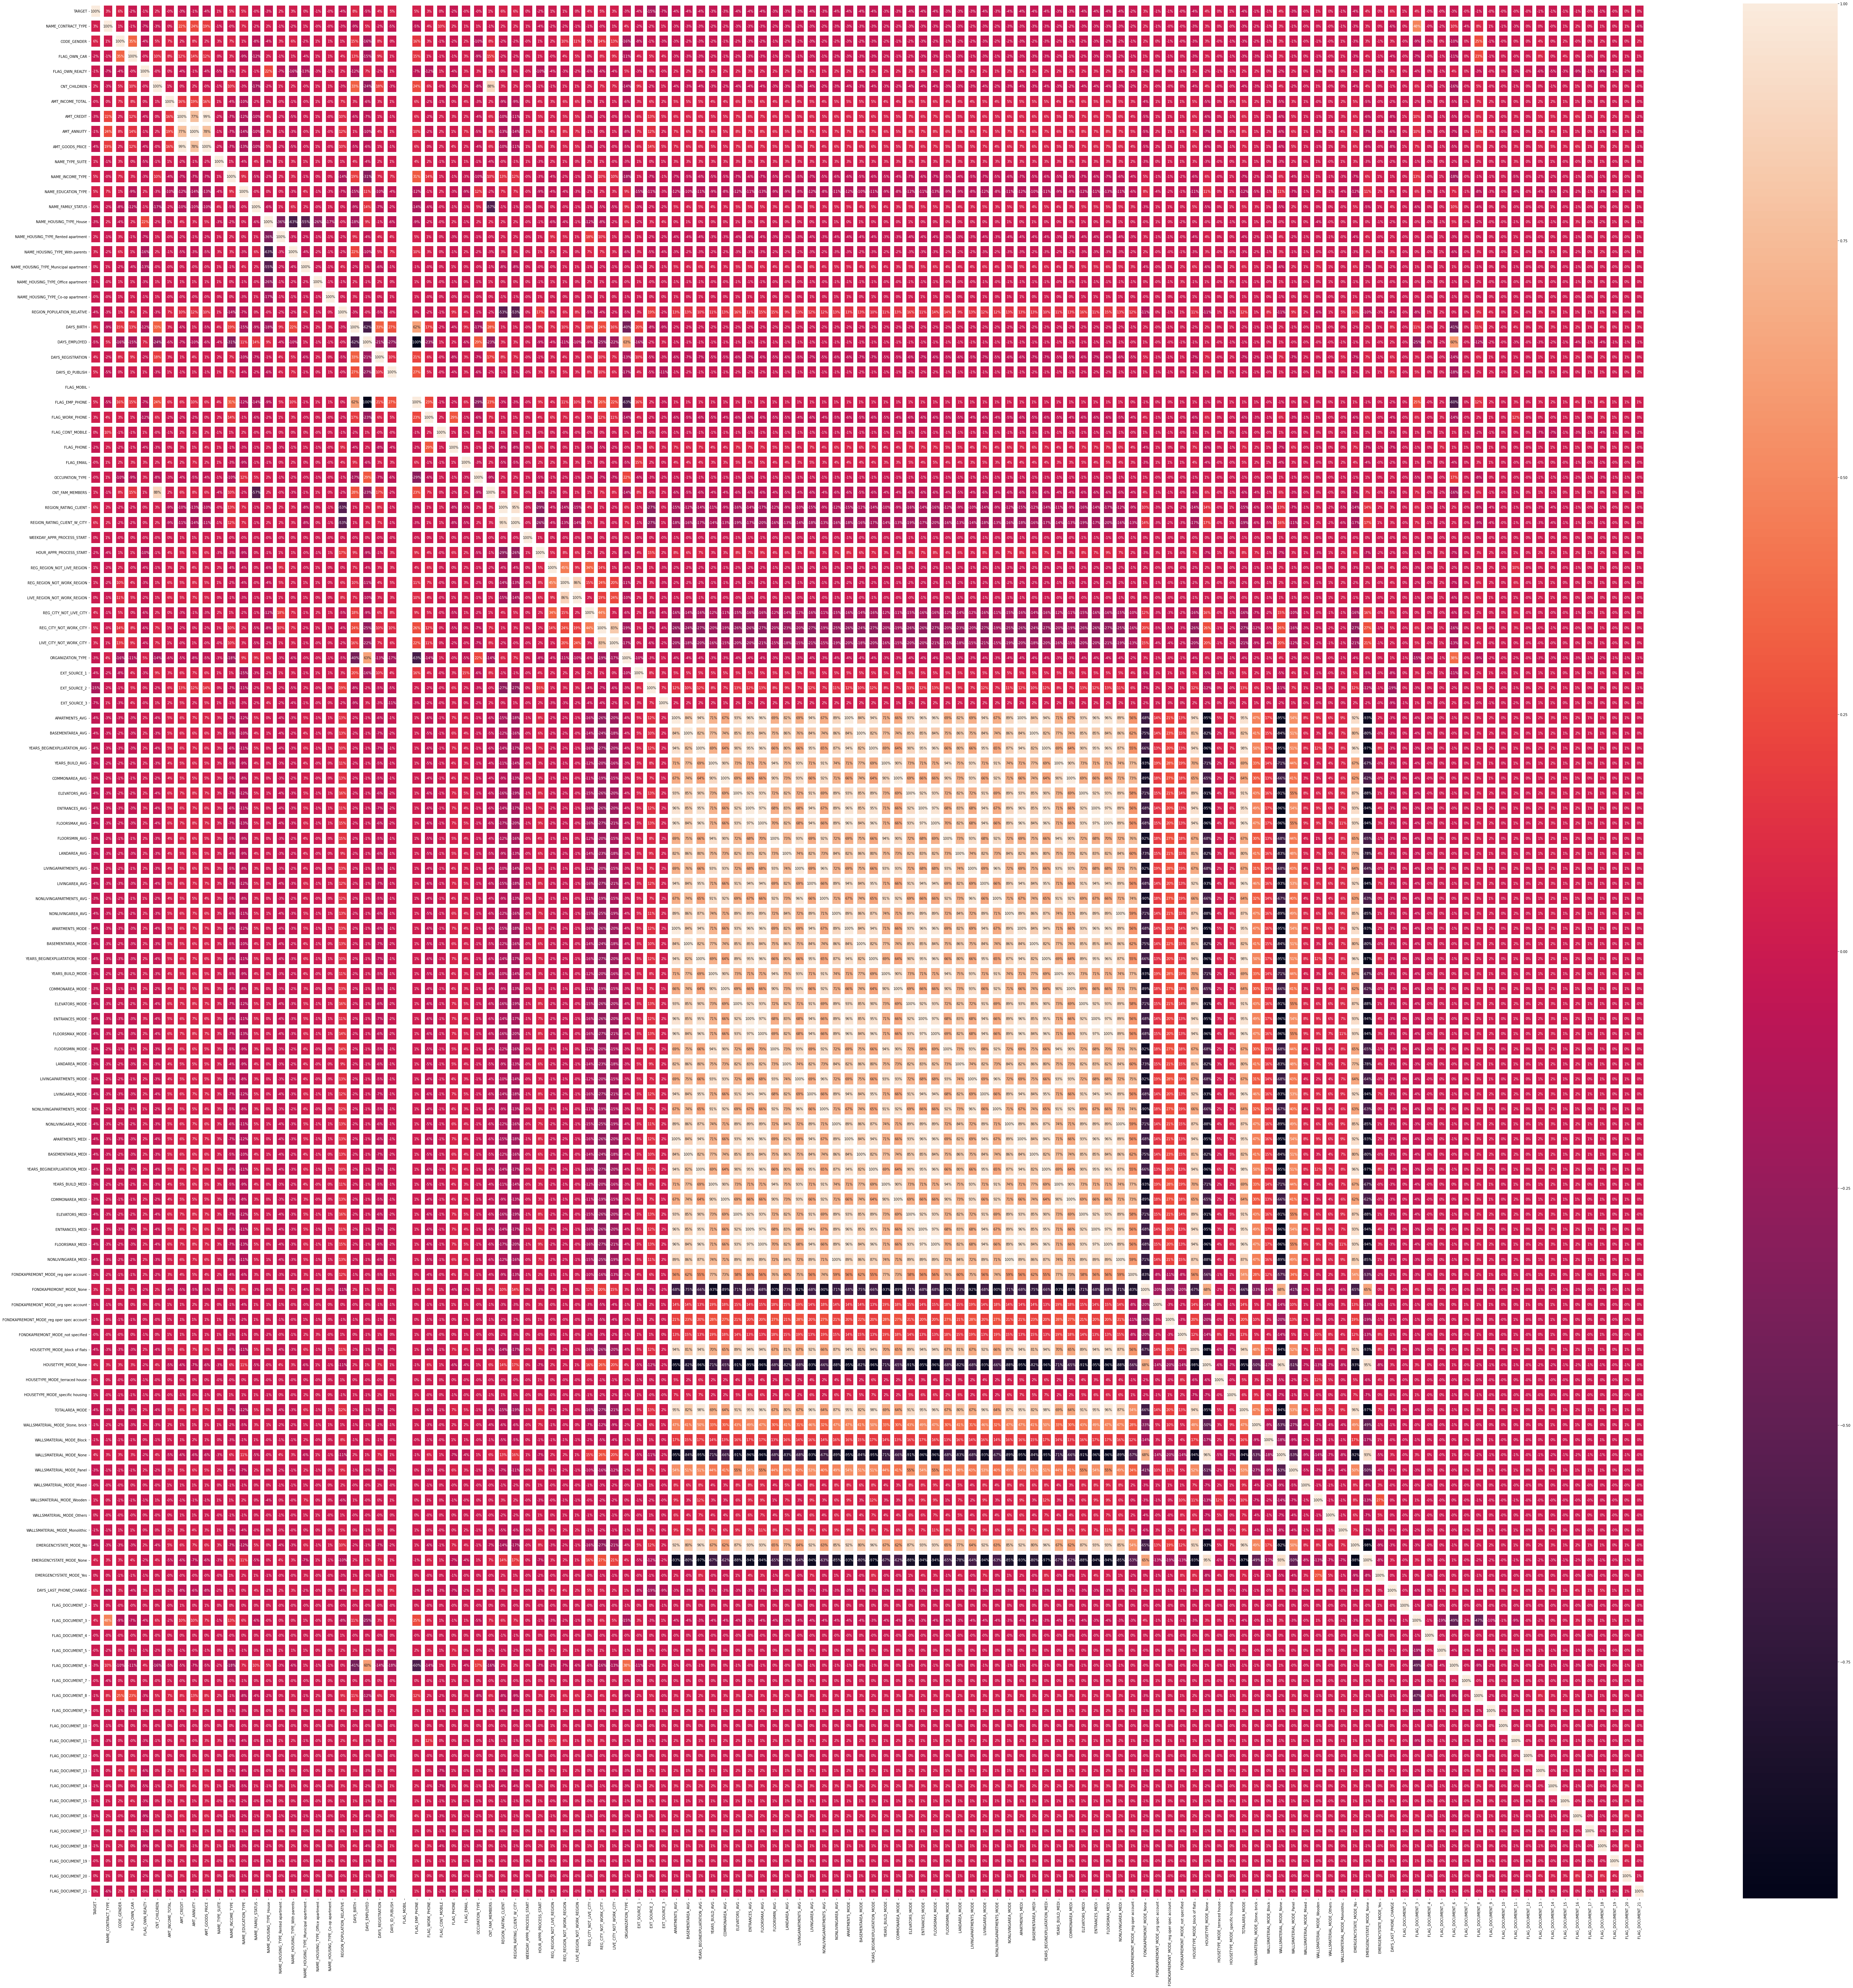

In [ ]:
# Visualizing correlation
fig, ax = plt.subplots(figsize=(100,100))
sns.heatmap(df.iloc[:,1:144].corr(),annot=True, linewidth = 10, ax=ax, fmt='.0%')

In [ ]:
temp = df[['TARGET','FLAG_DOCUMENT_3',  'FLAG_DOCUMENT_2' ,  'DAYS_LAST_PHONE_CHANGE',  'EMERGENCYSTATE_MODE_None', 'WALLSMATERIAL_MODE_None', 'WALLSMATERIAL_MODE_Wooden', 'HOUSETYPE_MODE_specific housing', 'HOUSETYPE_MODE_None', 'FONDKAPREMONT_MODE_None', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_BIRTH', 'NAME_HOUSING_TYPE_Rented apartment','NAME_HOUSING_TYPE_With parents', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN']]

# Splitting

In [ ]:
# -------------------  Splitting Begins Here ------------------------------------------

# Splitting the dataset into independent X and dependent Y
x = temp.drop(['TARGET'],axis=1)
y = df['TARGET']

# Train and Test Split --- > Train : 70%, Test : 30%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, random_state=0)
print("Training dataset shape : ",x_train.shape)
print("Testing dataset shape : ",x_test.shape)
x_train.head()


Training dataset shape :  (214341, 30)
Testing dataset shape :  (91861, 30)


FLAG_DOCUMENT_3  FLAG_DOCUMENT_2  DAYS_LAST_PHONE_CHANGE  \
88586                 1                0                  -975.0   
126206                1                0                    -5.0   
208322                1                0                 -1106.0   
267757                1                0                  -466.0   
164180                1                0                    -3.0   

        EMERGENCYSTATE_MODE_None  WALLSMATERIAL_MODE_None  \
88586                          0                        0   
126206                         1                        1   
208322                         1                        1   
267757                         1                        1   
164180                         1                        1   

        WALLSMATERIAL_MODE_Wooden  HOUSETYPE_MODE_specific housing  \
88586                           0                                0   
126206                          0                                0   
208322                          0                                0   
267757                          0                                0   
164180                          0                                0   

        HOUSETYPE_MODE_None  FONDKAPREMONT_MODE_None  REG_CITY_NOT_LIVE_CITY  \
88586                     0                        0                       1   
126206                    1                        1                       0   
208322                    1                        1                       1   
267757                    1                        1                       1   
164180                    1                        1                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
88586                        1                        0   
126206                       1                        1   
208322                       0                        1   
267757                       1                        0   
164180                       1                        1   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
88586                            0                           0   
126206                           0                           0   
208322                           0                           0   
267757                           0                           0   
164180                           0                           0   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
88586               2.0                     2                            2   
126206              2.0                     2                            2   
208322              3.0                     2                            2   
267757              2.0                     2                            2   
164180              2.0                     2                            2   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
88586                1                1            -9037.0            -1450   
126206               1                0            -4073.0            -3996   
208322               1                0            -8032.0            -4374   
267757               1                0            -8146.0             -508   
164180               1                0            -2352.0            -2348   

        DAYS_BIRTH  NAME_HOUSING_TYPE_Rented apartment  \
88586       -17900                                   0   
126206      -20439                                   0   
208322      -15109                                   0   
267757       -9413                                   0   
164180      -16111                                   0   

        NAME_HOUSING_TYPE_With parents  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
88586                                0              6.0               7.0   
126206                               0              6.0               1.0   
208322                               0              6.

#Scaling

In [ ]:
# -------------------  Scaling Begins Here ------------------------------------------

# Scaling our data in order to remove biasness or deviance - Feature Scaling
# Method - Min Max Scaling Method
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
# Transforming
x_train_temp = scaler.transform(x_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Model Running

#Logistic Regression

In [ ]:
# ---------------------------------- Logistic Regression -----------------------------
model_conduct = LogisticRegression()
model_conduct.fit(x_train, y_train) #Training the model
predictions = model_conduct.predict(x_test)
print(predictions)# printing predictions


[0 0 0 ... 0 0 0]


In [ ]:
# Logistic Regression Accuracy Test
LogisticRegressionAccuracyTest = accuracy_score(y_test, predictions)
print("Accuracy of Logistic Regression : ",LogisticRegressionAccuracyTest)

Accuracy of Logistic Regression :  0.9198136314649307


#Decision Tree

In [ ]:
#---------------------- Decision Tree -------------------------------------------
conduct = DecisionTreeClassifier(criterion='entropy',random_state=20)
conduct.fit(x_train, y_train)
y_prediction = conduct.predict(x_test)
DecisionTreeAccuracyTest = accuracy_score(y_prediction,y_test)
print("Accuracy of Decision Tree : ",DecisionTreeAccuracyTest) #Decision Tree Accuracy

Accuracy of Decision Tree :  0.8488803736079511


Text(0, 0.5, 'Accuracy')

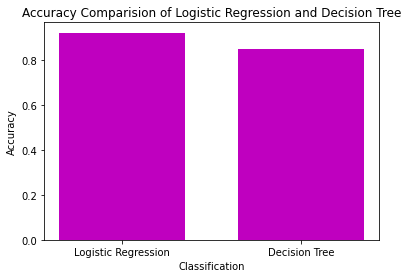

In [ ]:
# -------------------- DT vs LR -----------------------------
fig, ax = plt.subplots()
names = ['Logistic Regression','Decision Tree']
acc =[LogisticRegressionAccuracyTest, DecisionTreeAccuracyTest]
position = [1,2]
ax.bar(position,acc, width=0.7, color="m", bottom=None, align='center')
plt.xticks(position,names)
ax.set_title('Accuracy Comparision of Logistic Regression and Decision Tree')
ax.set_xlabel('Classification')
ax.set_ylabel('Accuracy')

In [ ]:
# ---------------------  Support Vector Classifier ---------------------------------
# from sklearn.svm import SVC
# svc = SVC(kernel="linear")
# svc.fit(x_train,y_train)
# accuracy_train_01 = svc.score(x_train,y_train)
# accuracy_test_01 = svc.score(x_test,y_test)
# print("Training accuracy is {:.2f}".format(accuracy_train_01))
# print("Testing accuracy is {:.2f}".format(accuracy_test_01))

# predictions = svc.predict(x_test)
# print(predictions)

#Random Forest

In [ ]:
# --------------------------Random Forest -----------------------------------
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=22)
rfc.fit(x_train, y_train)
accuracy_train_RFC=rfc.score(x_train, y_train)
accuracy_test_RFC=rfc.score(x_test, y_test)
print("Training accuracy is {:.2f}".format(accuracy_train_RFC))
print("Testing accuracy is {:.2f}".format(accuracy_test_RFC))

Training accuracy is 0.99
Testing accuracy is 0.92


#Neural Network Classifier

In [ ]:
#-------------------Neural Network Classifier---------------------------------
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

nnc.fit(x_train, y_train)

accuracy_train_nnc= nnc.score(x_train, y_train)
accuracy_test_nnc= nnc.score(x_test, y_test)
print("Training accuracy is {:.2f}".format(accuracy_train_nnc))
print("Testing accuracy is {:.2f}".format(accuracy_test_nnc))

predictions = nnc.predict(x_test)
print(predictions)


Training accuracy is 0.92
Testing accuracy is 0.92
[0 0 0 ... 0 0 0]


#GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

# create the model
GNB = GaussianNB()

# train the model on the training data
GNB.fit(x_train, y_train)

# make predictions on the test data
predictions = GNB.predict(x_test)

# compute the accuracy of the predictions
accuracyGNB = accuracy_score(y_test, predictions)

print("Accuracy:", accuracyGNB)

Accuracy: 0.8586451268764764


#Comparison

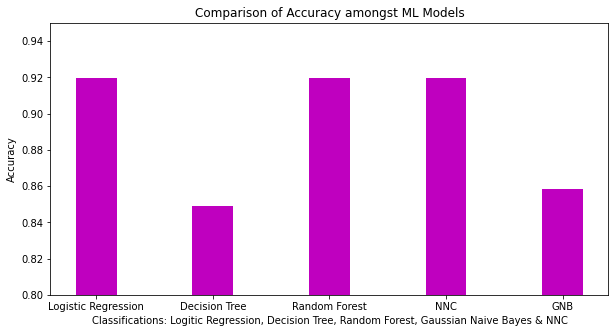

In [ ]:
import math
data = {'Logistic Regression':LogisticRegressionAccuracyTest , 
        'Decision Tree':DecisionTreeAccuracyTest,
        'Random Forest' : accuracy_test_RFC,
        'NNC':accuracy_test_nnc,
        'GNB':accuracyGNB}
attributesUsed = list(data.keys())
scores = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(attributesUsed, scores, width=0.35, color='m')
plt.xlabel('Classifications: Logitic Regression, Decision Tree, Random Forest, Gaussian Naive Bayes & NNC')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy amongst ML Models')
low = min(y)
high = max(y)
plt.ylim([.8, .95])
plt.show()

In [ ]:
# ---------------------------Principle Component Analysis------------------------------
temp.keys()

Index(['TARGET', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_2',
       'DAYS_LAST_PHONE_CHANGE', 'EMERGENCYSTATE_MODE_None',
       'WALLSMATERIAL_MODE_None', 'WALLSMATERIAL_MODE_Wooden',
       'HOUSETYPE_MODE_specific housing', 'HOUSETYPE_MODE_None',
       'FONDKAPREMONT_MODE_None', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_BIRTH',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN'],
      dtype='object')

In [ ]:
# ------------------ Scaling the values before PCA ------------------------
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
xScaledTrain=scaler.fit_transform(x_train)

In [ ]:
temp.shape

(306202, 31)

In [ ]:






from sklearn.decomposition import PCA 
pca = PCA(n_components=5)

principal_components= pca.fit_transform(xScaledTrain)
print(principal_components)

pca.explained_variance_ratio_

sum(pca.explained_variance_ratio_)

principal_df = pd.DataFrame(data=principal_components, columns=["principle_component_1", "principle_component_2","3","4","5"])
main_df=pd.concat([principal_df, df[['benign_malignant']]], axis=1)
principal_df.head()

main_df = main_df.dropna(how='any')

xPCA=main_df.drop('benign_malignant',axis=1)
yPCA=main_df[['benign_malignant']]
x_train, x_test, y_train, y_test = train_test_split(xPCA, yPCA,stratify=yPCA, train_size=.8,random_state=42)
main_df.head()

[[-0.71528008  1.56406724 -0.80410378 -2.26350789 -0.81599219]
 [ 2.15481765 -0.45724412 -1.41932648 -0.04996911 -0.61256822]
 [ 2.35529812  0.29003402 -0.51076133  0.58351297 -0.04357679]
 ...
 [ 2.89712488  0.3885953  -0.90787898 -0.81882542 -1.67712083]
 [-0.38932468  2.96143681 -0.20926759 -0.21954046  0.47206516]
 [-1.45228786 -2.86439712 -0.70659923 -0.06678833  0.99449289]]


KeyError: ignored